In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [29]:
test = pd.read_csv("test_from_R.csv")
train = pd.read_csv("train_from_R.csv")

train['season'] = train.season.astype('category')
train['holiday'] = train.holiday.astype('category')
train['workingday'] = train.workingday.astype('category')
train['weather'] = train.weather.astype('category')



test['season'] = test.season.astype('category')
test['holiday'] = test.holiday.astype('category')
test['workingday'] = test.workingday.astype('category')
test['weather'] = test.weather.astype('category')

In [30]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2,0,1,2,14.76,18.180,87.0,7.0015,84
1,4,0,1,1,20.50,24.240,51.0,12.9980,179
2,2,0,1,2,24.60,31.060,38.0,0.0000,217
3,3,0,1,1,30.34,32.575,35.0,7.0015,229
4,1,0,1,2,8.20,9.090,40.0,19.0012,54
...,...,...,...,...,...,...,...,...,...
1962,1,0,1,1,16.40,20.455,43.0,11.0014,234
1963,1,0,1,3,9.02,9.850,87.0,22.0028,10
1964,2,0,1,1,20.50,24.240,51.0,26.0027,107
1965,3,0,1,1,33.62,37.120,43.0,7.0015,203


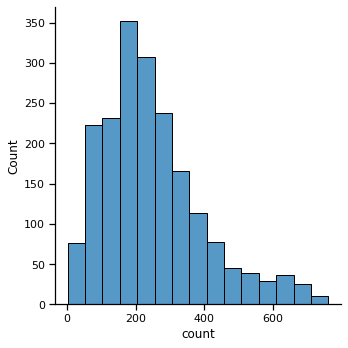

In [31]:
sns.set_context("notebook")
sns.displot(x="count",data=train,kind="hist",bins=15)

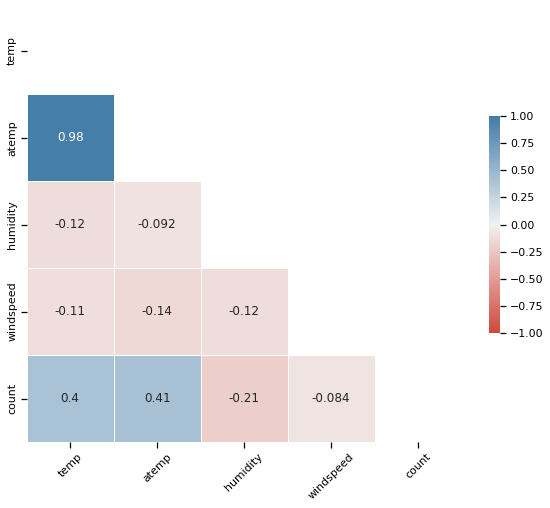

In [32]:
df_numeric = train[["temp","atemp","humidity","windspeed","count"]]
corr = df_numeric.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(10,8))
cmap = sns.diverging_palette(15,240,as_cmap=True)
plot=sns.heatmap(corr,mask=mask,vmax=1,vmin=-1,center=0,cmap=cmap,square=True,cbar_kws={"shrink":.5},
            linewidth=1,ax=ax,annot=True)
plot.tick_params(axis='x', rotation=45)

C:\Users\dovyd\AppData\Local\Temp/ipykernel_13872/930656339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["count"] = np.log(df_numeric["count"])


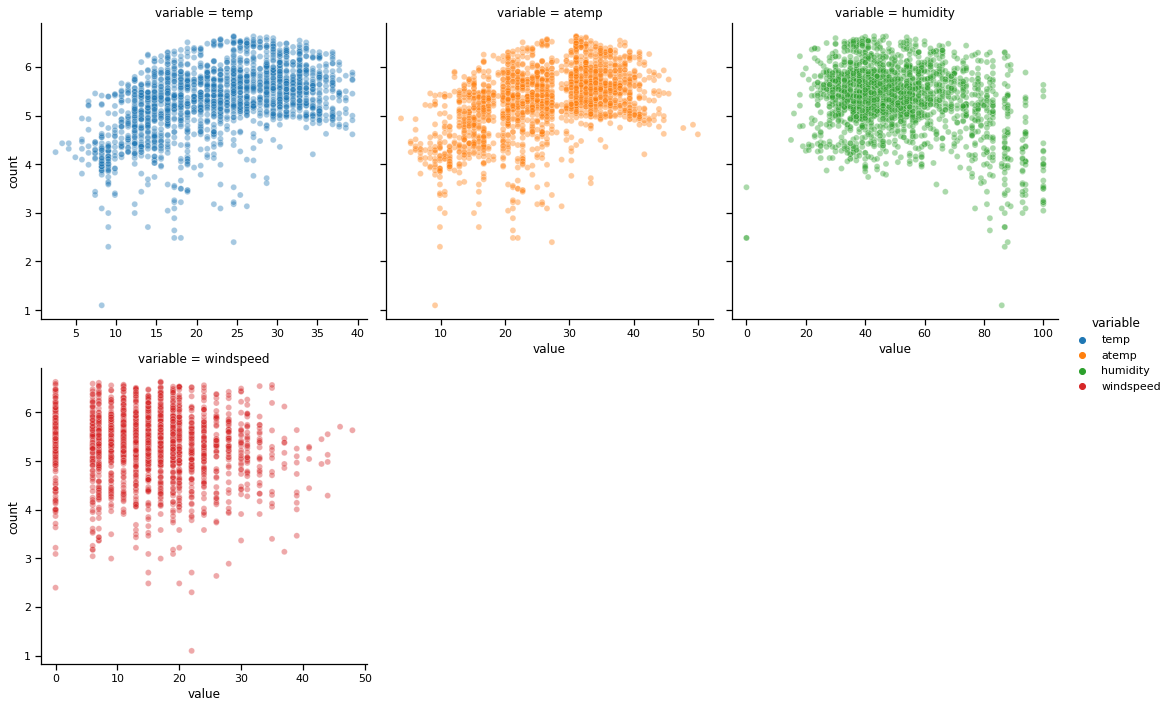

In [33]:
df_numeric = train[["temp","atemp","humidity","windspeed","count"]]
df_numeric["count"] = np.log(df_numeric["count"])
df_long = df_numeric.melt("count")
            
sns.relplot(x="value",y="count",data=df_long,col="variable",hue="variable",
            alpha=0.4,kind="scatter",col_wrap=3,facet_kws={'sharex': False})

In [34]:
train = train.drop("temp",axis=1)
test = test.drop("temp",axis=1)

C:\Users\dovyd\AppData\Local\Temp/ipykernel_13872/628830076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical["count"] = df_categorical["count"]
C:\Users\dovyd\anaconda3\lib\site-packages\seaborn\categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


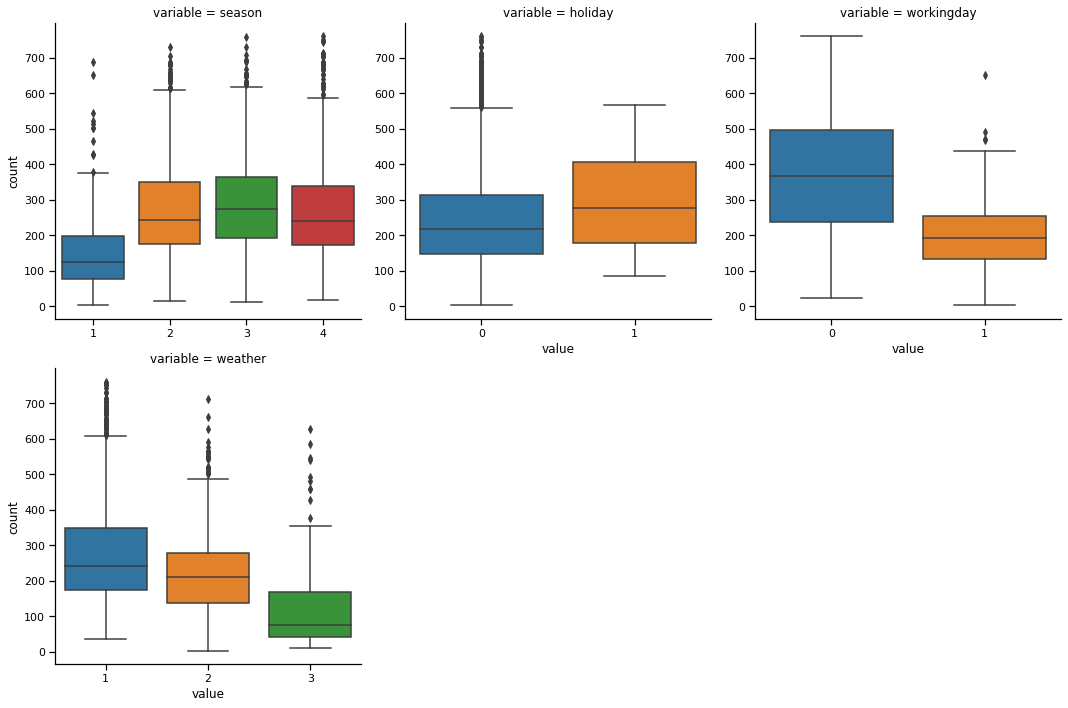

In [36]:
df_categorical = train[["season","holiday","workingday","weather","count"]]
df_categorical["count"] = df_categorical["count"]
df_long = df_categorical.melt("count")
            
sns.catplot(x="value",y="count",data=df_long,col="variable",kind="box",col_wrap=3,sharey=False,sharex=False)

In [ ]:
import patsy

y, X = patsy.dmatrices('count ~ season + holiday + workingday + weather + atemp + humidity + windspeed',
                       data=train, return_type='dataframe')

y_test, X_test = patsy.dmatrices('count ~ season + holiday + workingday + weather + atemp + humidity + windspeed',
                       data=test, return_type='dataframe')

#### Poisson model

In [10]:
model_1=sm.GLM(y,X,family=sm.families.Poisson())
res_1=model_1.fit()
dispersion = res_1.deviance / res_1.df_resid
print(dispersion)

31.699540558317672


In [11]:
model_2=sm.GLM(y,X,family=sm.families.Poisson(),var_weights=np.repeat(1/dispersion,len(y)))
res_2=model_2.fit()
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  count   No. Observations:                 1967
Model:                            GLM   Df Residuals:                     1956
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1200.1
Date:                Tue, 29 Mar 2022   Deviance:                       1956.0
Time:                        13:56:40   Pearson chi2:                 1.96e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.3583      0.049    108.821      0.000       5.262       5.455
season[T.2]         0.3683      0.032     11.438      0.000       0.305       0.431
season[T.3]         0.2615      0.039      6.756      0.000       0.186       0.337
season[T.4]         0.4749      0.028     16.669      0.000       0.419       0.531
holiday[T.1]       -0.2884      0.045     -6.345      0.000      -0.377      -0.199
workingday[T.1]    -0.6747      0.017    -40.431      0.000      -0.707      -0.642
weather[T.2]       -0.0036      0.021     -0.171      0.864      -0.045       0.038
weather[T.3]       -0.4894      0.046    -10.652      0.000      -0.580      -0.399
atemp               0.0217      0.002     13.938      0.000       0.019       0.025
humidity           -0.0046      0.001     -7.584      0.000      -0.006      -0.003
windspeed          -0.0031      0.001     -3.198      0.001      -0.005      -0.001
===================================================================================
"""

C:\Users\dovyd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Pearson residuals')

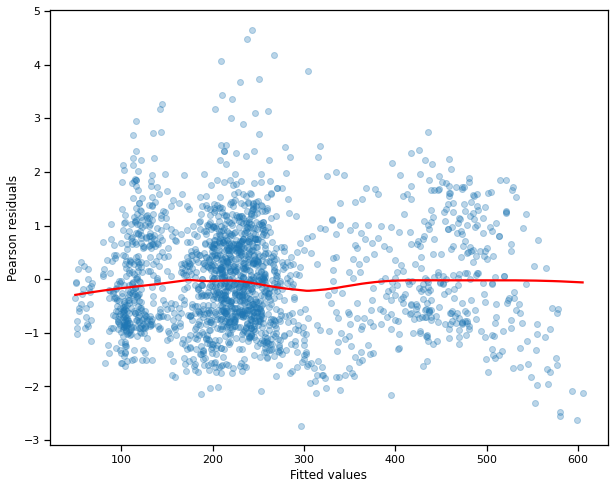

In [165]:
fig, ax = plt.subplots(1,1,figsize=(10, 8))
ax = sns.regplot(res_2.mu,res_2.resid_pearson,ax=ax,scatter_kws={"alpha":0.3},line_kws={"color":"red"},lowess=True)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Pearson residuals")

In [12]:
np.exp(res_2.params)

Intercept          212.358282
season[T.2]          1.445307
season[T.3]          1.298817
season[T.4]          1.607846
holiday[T.1]         0.749467
workingday[T.1]      0.509287
weather[T.2]         0.996372
weather[T.3]         0.612968
atemp                1.021897
humidity             0.995417
windspeed            0.996951
dtype: float64

Text(0.5, 0.98, 'Negative binomial model')

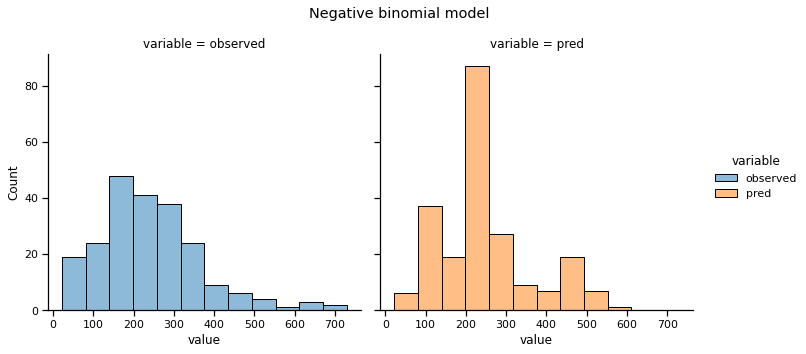

In [13]:
results = pd.DataFrame({"observed":test["count"],"pred":res_2.predict(X_test)})
ax = sns.displot(x="value",col="variable",hue="variable",data=results.melt(),bins=12)
ax.fig.subplots_adjust(top=0.85) 
ax.fig.suptitle("Negative binomial model")

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE:",np.sqrt(mean_squared_error(results["observed"],results["pred"])))

print("MAE:",mean_absolute_error(results["observed"],results["pred"]))

RMSE: 85.15644045284655
MAE: 65.365976605366


#### Negative binomial

In [169]:
model_3=sm.GLM(y,X,family=sm.families.NegativeBinomial(alpha=1/6.64))
res_3=model_3.fit()
res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  count   No. Observations:                 1967
Model:                            GLM   Df Residuals:                     1956
Model Family:        NegativeBinomial   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11492.
Date:                Sun, 27 Mar 2022   Deviance:                       2035.6
Time:                        22:58:59   Pearson chi2:                 1.91e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.2858      0.052    102.262      0.000       5.185       5.387
season[T.2]         0.3266      0.032     10.238      0.000       0.264       0.389
season[T.3]         0.2172      0.040      5.466      0.000       0.139       0.295
season[T.4]         0.4465      0.028     15.885      0.000       0.391       0.502
holiday[T.1]       -0.2751      0.055     -4.982      0.000      -0.383      -0.167
workingday[T.1]    -0.6668      0.020    -33.336      0.000      -0.706      -0.628
weather[T.2]        0.0102      0.023      0.443      0.658      -0.035       0.055
weather[T.3]       -0.5419      0.041    -13.209      0.000      -0.622      -0.461
atemp               0.0264      0.002     15.887      0.000       0.023       0.030
humidity           -0.0053      0.001     -8.205      0.000      -0.007      -0.004
windspeed          -0.0030      0.001     -2.865      0.004      -0.005      -0.001
===================================================================================
"""

C:\Users\dovyd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Pearson residuals')

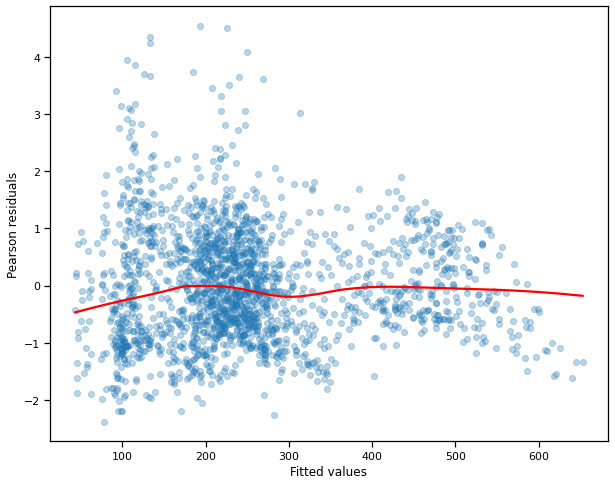

In [170]:
fig, ax = plt.subplots(1,1,figsize=(10, 8))
ax = sns.regplot(res_3.mu,res_3.resid_pearson,ax=ax,scatter_kws={"alpha":0.3},line_kws={"color":"red"},lowess=True)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Pearson residuals")

In [171]:
np.exp(res_3.params)

Intercept          197.516616
season[T.2]          1.386241
season[T.3]          1.242618
season[T.4]          1.562877
holiday[T.1]         0.759489
workingday[T.1]      0.513364
weather[T.2]         1.010218
weather[T.3]         0.581659
atemp                1.026768
humidity             0.994749
windspeed            0.997020
dtype: float64

Text(0.5, 0.98, 'Negative binomial model')

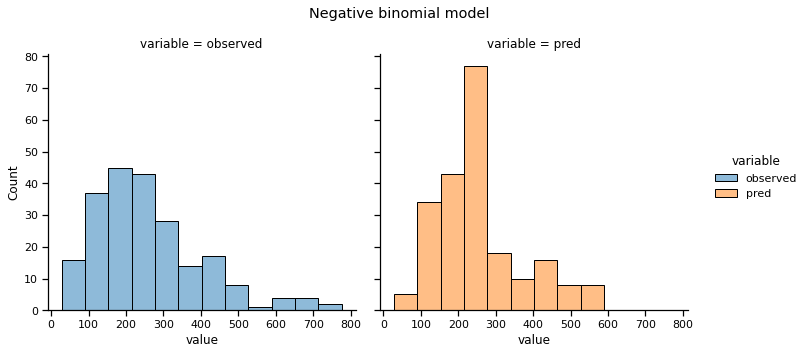

In [172]:
results = pd.DataFrame({"observed":test["count"],"pred":res_3.predict(X_test)})
ax = sns.displot(x="value",col="variable",hue="variable",data=results.melt(),bins=12)
ax.fig.subplots_adjust(top=0.85) 
ax.fig.suptitle("Negative binomial model")

In [173]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE:",np.sqrt(mean_squared_error(results["observed"],results["pred"])))

print("MAE:",mean_absolute_error(results["observed"],results["pred"]))

RMSE: 96.86917306613684
MAE: 74.94004248627321
